# Recommender Systems with Python

A recommendation system in Python is a tool or algorithm that suggests items to users based on their preferences or behavior. It's commonly used in various applications, such as e-commerce, streaming services, or content platforms, to enhance user experience by providing personalized suggestions.

In [23]:
import numpy as np
import pandas as pd

# we are going to find recommand system for movie ratings dataset with different user id's

# Get the Data

In [31]:
#here we are going to get the data file(it's not like a csv.it's non-file data)
column_names=['user_id','item_id','rating','timestamp']
df=pd.read_csv('u.data',sep='\t',names=column_names)#df = pd.read_csv('u.data', sep='\t', names=column_names): Reads data from the file named 'u.data' into a Pandas DataFrame (df). The sep='\t' parameter indicates that the data is tab-separated. The names=column_names parameter assigns the column names to the DataFrame.

In [32]:
df

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [33]:
df.notna().sum()

user_id      100003
item_id      100003
rating       100003
timestamp    100003
dtype: int64

In [34]:
#getting information about df dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100003 non-null  int64
 1   item_id    100003 non-null  int64
 2   rating     100003 non-null  int64
 3   timestamp  100003 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


# Now let's get the movie titles from csv file

In [35]:
movie_titles=pd.read_csv("Movie_Id_Titles.csv")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


# We can merge them together(both dataframe)

In [36]:
dd=pd.merge(df,movie_titles,on='item_id')#item_id-->this column is the common column of both dataframe so we going to merge both datset using item_id column

In [38]:
dd

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


# EDA(Exploratory Data Analysis)
Let's explore the data a bit and get a look at some of the best rated movies.

# Visualization Imports

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
%matplotlib inline

# Let's create a ratings dataframe with average rating and number of ratings:

In [43]:
dd.groupby(['title'])['rating'].mean().sort_values(ascending=False).head()#after finding the average we sorting the values in decending order and displaying only first five values

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [45]:
dd.groupby(['title'])['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [46]:
#now crating dataframe for Rating.mean() and rating.count()
ratings=pd.DataFrame(dd.groupby(['title'])['rating'].mean())

In [47]:
ratings

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [48]:
ratings['num of ratings']=pd.DataFrame(dd.groupby('title')['rating'].count())

In [49]:
ratings

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


# Now a few histograms using ratings dataset

<Axes: >

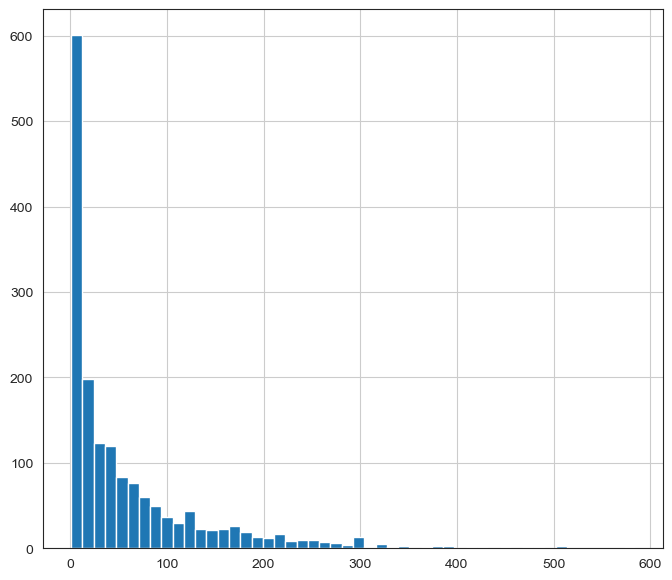

In [53]:
plt.figure(figsize=(8,7))
ratings['num of ratings'].hist(bins=50)

<Axes: >

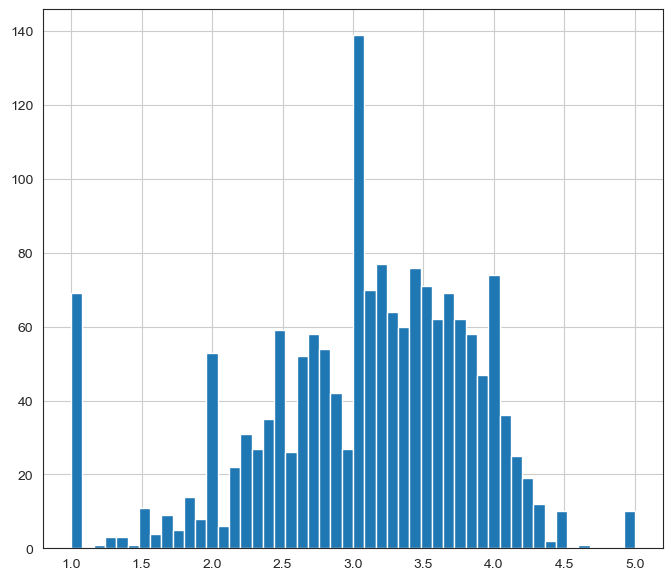

In [54]:
plt.figure(figsize=(8,7))
ratings['rating'].hist(bins=50)

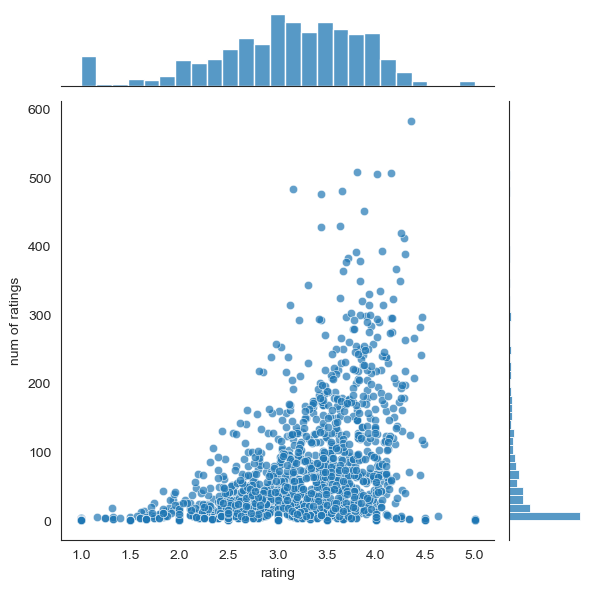

In [55]:
#creating joint plot to compare both columns(rating,num of ratings)
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.7)

Okay! Now that we have a general idea of what the data looks like, let's move on to creating a simple recommendation system:

# Recommending Similar Movies
Now let's create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [59]:
#creating pivot table -A pivot table in Pandas is a way to reorganize and summarize data in a DataFrame. It allows you to reshape and transform your data, providing a more structured and organized view
pivot=dd.pivot_table(index='user_id',columns='title',values='rating')
pivot.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Most rated movie:

In [63]:
ratings.sort_values('num of ratings',ascending=False).head()

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


Let's choose two movies: starwars, a sci-fi movie. And Liar Liar, a comedy.

In [65]:
#Now let's grab the user ratings for those two movies:
starwars_userratings=pivot['Star Wars (1977)']
liarliar_user_ratings = pivot['Liar Liar (1997)']
starwars_userratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

# We can then use corrwith() method to get correlations between two pandas series:

In [66]:
#here we getting correlation between similar_to_starwars,similar_to_liarlia and otherthan pivot datset columns
similar_to_starwars=pivot.corrwith(starwars_userratings)
similar_to_liarliar=pivot.corrwith(liarliar_user_ratings)

C:\ProgramData\anaconda3\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\ProgramData\anaconda3\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\ProgramData\anaconda3\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\ProgramData\anaconda3\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [67]:
similar_to_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

# Let's clean this by removing NaN values and using a DataFrame instead of a series:

In [71]:
starwar_correlation=pd.DataFrame(similar_to_starwars,columns=['correlation'])#correlation measures the linear relationship between two variables. The correlation coefficient values range from -1 to 1, where:

                                                                             #1 indicates a perfect positive linear relationship,
                                                                             #-1 indicates a perfect negative linear relationship,
                                                                             #0 indicates no linear relationship.
starwar_correlation.dropna(inplace=True)
starwar_correlation.head()

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched star wars (it was the most popular movie).

In [73]:
starwar_correlation.sort_values('correlation',ascending=False).head(10)

,correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


Let's fix this by filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier).

In [75]:
#joining the ratings dataset num of ratings column nto the starwar_correlation
corr_starwars=starwar_correlation.join(ratings['num of ratings'])#it's used to join one column into the another dataset
corr_starwars.head(10)

,correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
2 Days in the Valley (1996),0.066654,93
"20,000 Leagues Under the Sea (1954)",0.289768,72
2001: A Space Odyssey (1968),0.230884,259
"39 Steps, The (1935)",0.106453,59


Now sort the values and notice how the titles make a lot more sense:

In [77]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('correlation',ascending=False).head(10)

,correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


# Now the same for the comedy Liar Liar

In [78]:
similar_to_liarliar

title
'Til There Was You (1997)                0.118913
1-900 (1994)                                  NaN
101 Dalmatians (1996)                    0.469765
12 Angry Men (1957)                      0.066272
187 (1997)                               0.175145
                                           ...   
Young Guns II (1990)                     0.352174
Young Poisoner's Handbook, The (1995)    0.445016
Zeus and Roxanne (1997)                 -0.500000
unknown                                  0.870388
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [79]:
corr_liarliar=pd.DataFrame(similar_to_liarliar,columns=['corrleations'])
corr_liar1=corr_liarliar.join(ratings['num of ratings'])
corr_liar1[corr_liar1['num of ratings']>100].sort_values('corrleations',ascending=False).head(10)

,corrleations,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
Pretty Woman (1990),0.469790,164
101 Dalmatians (1996),0.469765,109
Michael (1996),0.442022,119
Waterworld (1995),0.438405,102
